In [25]:
#Read file using Pandas
import pandas as pd

#Create DataFrame 
df = pd.read_csv("titanic.csv")
df.head() #Only show 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#drop some columns (features) that have unique define in each row for it to be easier to train and test
df.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [64]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


In [88]:
#Sex = {'male': 1, 'female': 2}
df.Sex[df.Sex == 'male'] = 1
df.Sex[df.Sex == 'female'] = 2
#data.Gender[data.Gender == 'male'] = 1
#data.Gender[data.Gender == 'female'] = 2
df.head()

/Users/sirilukkanchanakungwankul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/sirilukkanchanakungwankul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sirilukkanchanakungwankul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing i

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


In [81]:
X = df.drop('Survived',axis='columns')
y = df['Survived']
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [94]:
#Solve Age column that has NAN value 
X.Age[:10] 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [113]:
#fillna replace nan value with mean value of Age
X.Age = X.Age.fillna(X.Age.mean())

In [114]:
X.head(10)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,2,27.000000,11.1333
9,2,2,14.000000,30.0708


In [99]:
#Separate data into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [103]:
#Choose ML model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.7932960893854749

In [124]:
#Predict Survived
model.predict([[3,2,26,7]])

array([1])

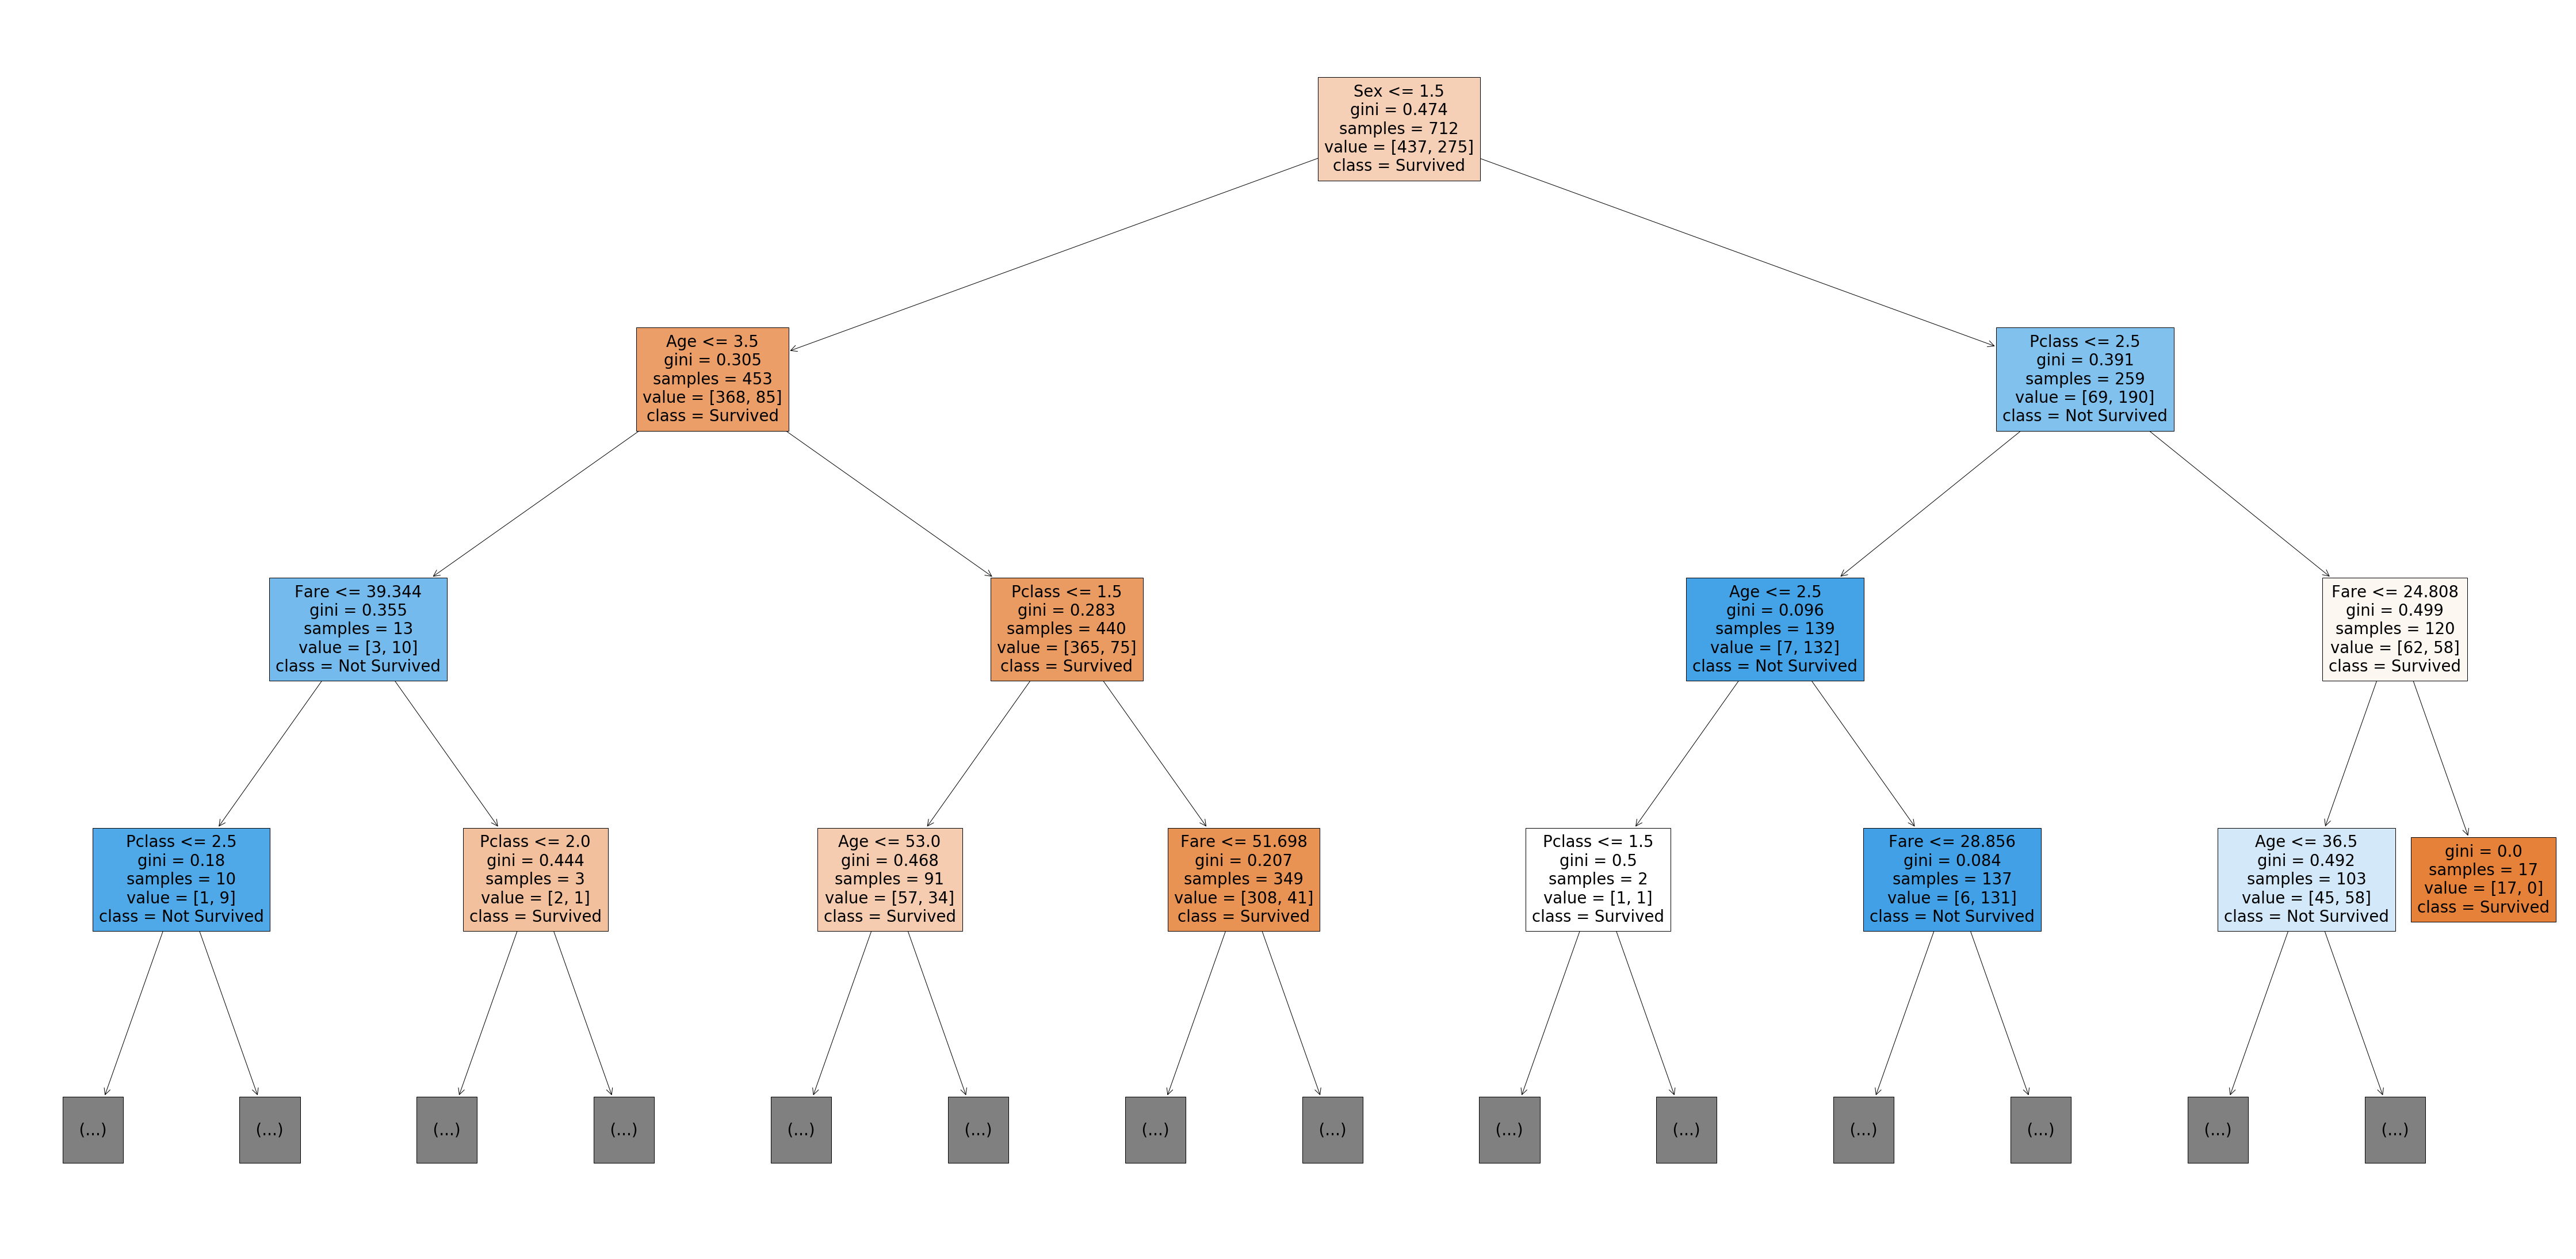

In [151]:
#Visualization decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(80,40))
tree.plot_tree(model,max_depth=3,feature_names=X.columns, class_names=['Survived',"Not Survived"], filled=True)
plt.show()